In [7]:
import pandas as pd


In [8]:
print("hi")

hi


In [9]:
df=pd.read_csv("P2- OfficeSupplies Data.csv")

In [10]:
df1=pd.read_json("P1- BankStatements.json")

In [11]:
df1.sample(10)

,Account
Profile,"{'Holders': {'type': 'SINGLE', 'Holder': {'nam..."
type,deposit
maskedAccNumber,XXXX6461
Transactions,"{'startDate': '2023-05-31', 'endDate': '2024-0..."
linkedAccRef,02f28b8d-d8a3-43d7-88c6-5fabb2e51541
xsi:schemaLocation,http://api.rebit.org.in/FISchema/deposit.xsd
xmlns:xsi,http://www.w3.org/2001/XMLSchema-instance
xmlns,http://api.rebit.org.in/FISchema/deposit
Summary,"{'currentBalance': '761.41', 'currency': 'INR'..."
version,1.1


In [12]:
df.shape

(43, 6)

In [13]:
df['Item'].value_counts()

Item
Binder     15
Pencil     13
Pen Set     7
Pen         5
Desk        3
Name: count, dtype: int64

In [14]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price'], dtype='object')

In [15]:
total_sales = df.groupby('Item')['Units'].sum()

In [16]:
total_sales = df.groupby('Item')['Units'].sum()
total_sales

Item
Binder     722
Desk        10
Pen        278
Pen Set    395
Pencil     716
Name: Units, dtype: int64

In [17]:
df['Rep'].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [18]:
Customer_sale = df.groupby('Rep')['Units'].sum()
Customer_sale

Rep
Alex       281
Bill       213
James      142
Matthew    193
Morgan     173
Nick       125
Rachel     183
Richard    396
Smith      156
Susan      170
Thomas      89
Name: Units, dtype: int64

In [19]:
df['Orderdate'] = pd.to_datetime(df['OrderDate'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5176\1780157855.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Orderdate'] = pd.to_datetime(df['OrderDate'])


In [20]:
purchase_frequency = df.groupby('Rep')['OrderDate'].count().reset_index()
purchase_frequency

,Rep,OrderDate
0,Alex,5
1,Bill,5
2,James,4
3,Matthew,4
4,Morgan,3
5,Nick,2
6,Rachel,4
7,Richard,8
8,Smith,3
9,Susan,3


In [21]:
purchase_frequencys = df.groupby('Rep')['OrderDate'].count()
purchase_frequencys

Rep
Alex       5
Bill       5
James      4
Matthew    4
Morgan     3
Nick       2
Rachel     4
Richard    8
Smith      3
Susan      3
Thomas     2
Name: OrderDate, dtype: int64

In [22]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month and year from 'OrderDate'
df['YearMonth'] = df['OrderDate'].dt.to_period('M')



C:\Users\ASUS\AppData\Local\Temp\ipykernel_5176\129886057.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


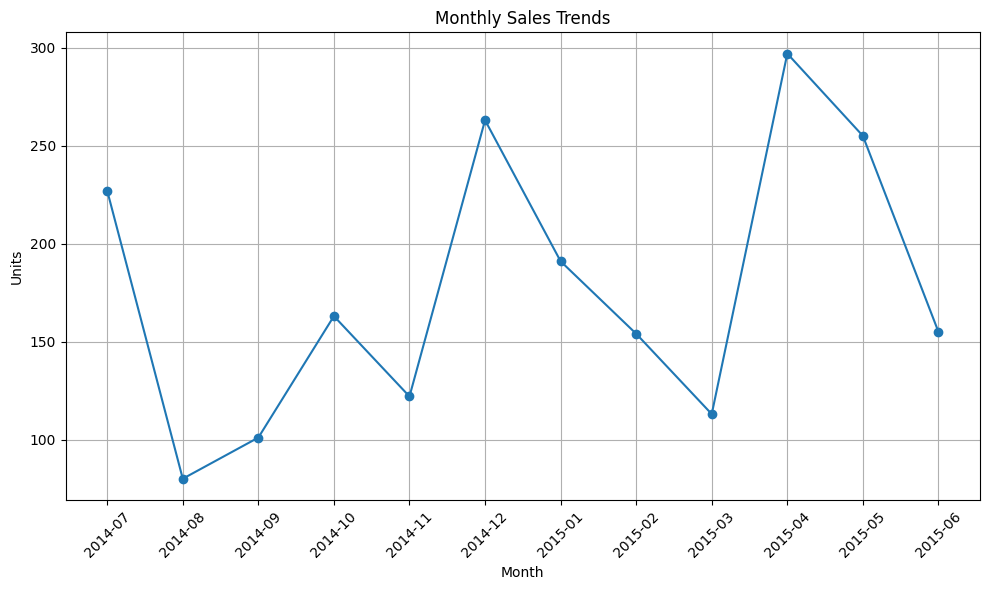

In [25]:
# Group by 'YearMonth' and sum 'SalesAmount'
monthly_sales = df.groupby('YearMonth')['Units'].sum().reset_index()

# Plotting the monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Units'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
monthly_sales

,YearMonth,Units
0,2014-07,227
1,2014-08,80
2,2014-09,101
3,2014-10,163
4,2014-11,122
5,2014-12,263
6,2015-01,191
7,2015-02,154
8,2015-03,113
9,2015-04,297


In [24]:
import matplotlib.pyplot as plt

In [ ]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     ---------------------------- --------- 122.9/165.5 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 995.2 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 5.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.0 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/8.0 MB 5.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 5.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 5.2 MB/s eta 0:00:02
   ------- -----------------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


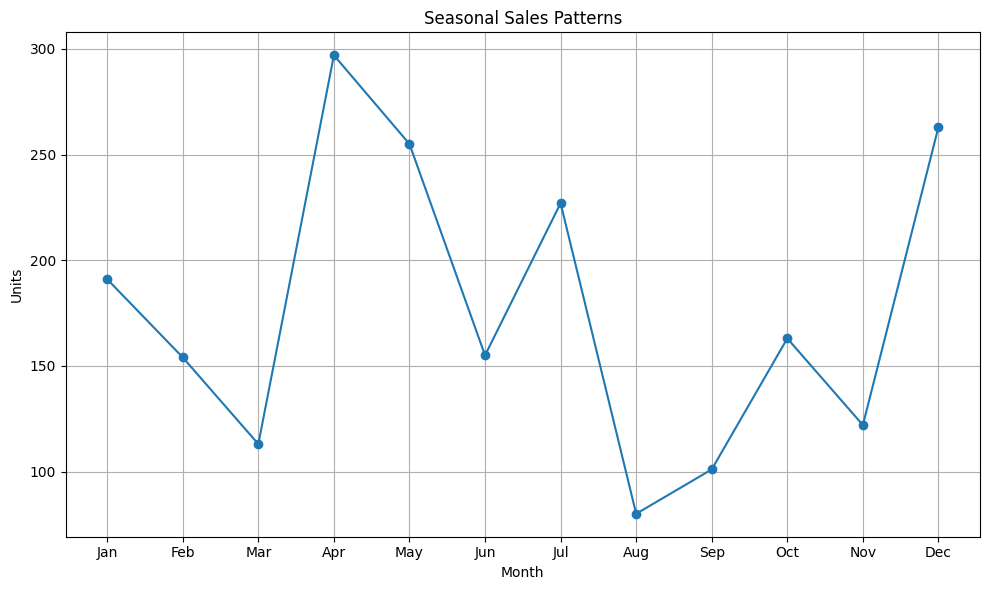

In [ ]:


# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month and year from 'OrderDate'
df['Month'] = df['OrderDate'].dt.month

# Group by month and sum 'SalesAmount'
monthly_sales = df.groupby('Month')['Units'].sum().reset_index()

# Plotting the seasonal sales patterns
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Units'], marker='o')
plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Units')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:



# Group by month and sum 'SalesAmount'
Region_sales = df.groupby('Region')['Units'].sum().reset_index()
Region_sales




,Region,Units
0,Central,1199
1,East,691
2,West,231


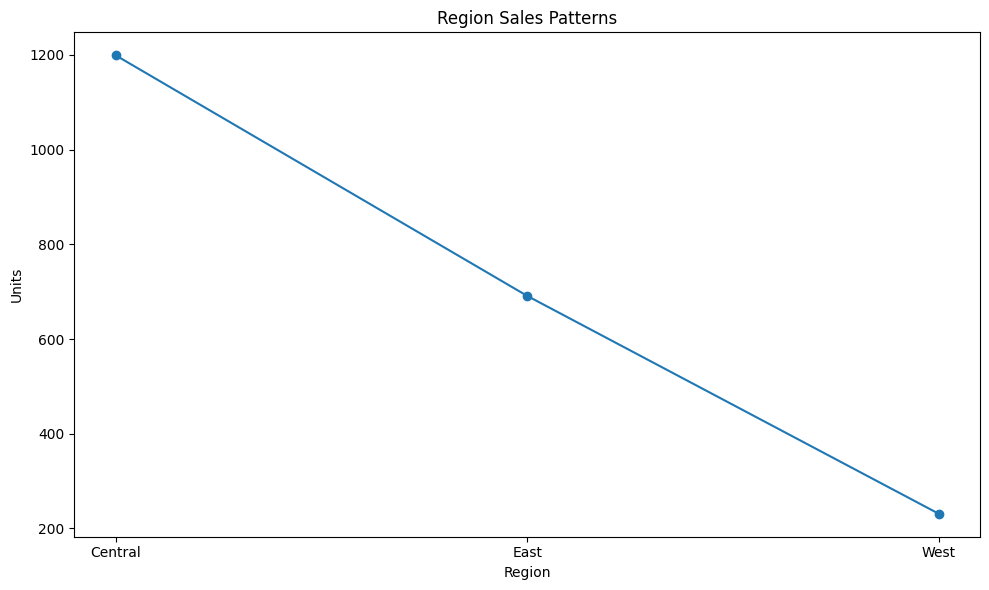

In [ ]:
# Plotting the seasonal sales patterns
plt.figure(figsize=(10, 6))
plt.plot(Region_sales['Region'], Region_sales['Units'], marker='o')
plt.title('Region Sales Patterns')
plt.xlabel('Region')
plt.ylabel('Units')
#plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
278+395

673

In [27]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Orderdate,YearMonth
0,2014-07-04,East,Richard,Pen Set,62,4.99,2014-07-04,2014-07
1,2014-07-12,East,Nick,Binder,29,1.99,2014-07-12,2014-07
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,2014-07-21,2014-07
3,2014-07-29,East,Susan,Binder,81,19.99,2014-07-29,2014-07
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,2014-08-07,2014-08


In [28]:
df['Profit'] = df['Units'] * df['Unit Price']

# Group by Item and Sum Profit
total_profits = df.groupby('Item')['Profit'].sum()

In [29]:
total_profits

Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Profit, dtype: float64

In [30]:
2045.22 + 4169.87


6215.09